## Predictions of BTC-USD Price Using SBi-LSTM and SBi-GRU

In [1]:
# load all functions
from C01_data_collection import data_collection
from C02_visualization import line_matplotlib
from C03_preprocessing import preprocessing
from C04_model_predictions import lstm_algorithm
#from C04_model_predictions import gru_algorithm

# hide all warning
import warnings
warnings.filterwarnings('ignore')

2024-06-03 04:40:06.022054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 04:40:06.057455: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 04:40:06.057494: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 04:40:06.057521: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-03 04:40:06.063882: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 04:40:06.064319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

- config models

In [2]:
# set random number
import tensorflow as tf
tf.random.set_seed(1234)

In [3]:
# set algorithms
algorithms = "SBi-LSTM"   # fill the value by SBi-LSTM or SBi-GRU
# algorithms = "SBi-GRU"   # fill the value by SBi-LSTM or SBi-GRU

### 1. Data Collections

In [4]:
# load dataset
dataset = data_collection("BTC-USD.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3408 entries, 2015-01-01 to 2024-04-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3408 non-null   float64
 1   High    3408 non-null   float64
 2   Low     3408 non-null   float64
 3   Close   3408 non-null   float64
dtypes: float64(4)
memory usage: 133.1 KB


In [5]:
# show dataset
print(dataset.tail())

                    Open          High           Low         Close
Date                                                              
2024-04-26  64485.371094  64789.656250  63322.398438  63755.320313
2024-04-27  63750.988281  63898.363281  62424.718750  63419.140625
2024-04-28  63423.515625  64321.484375  62793.597656  63113.230469
2024-04-29  63106.363281  64174.878906  61795.457031  63841.121094
2024-04-30  63839.417969  64703.332031  59120.066406  60636.855469


### 2. Exploration Data Analysis

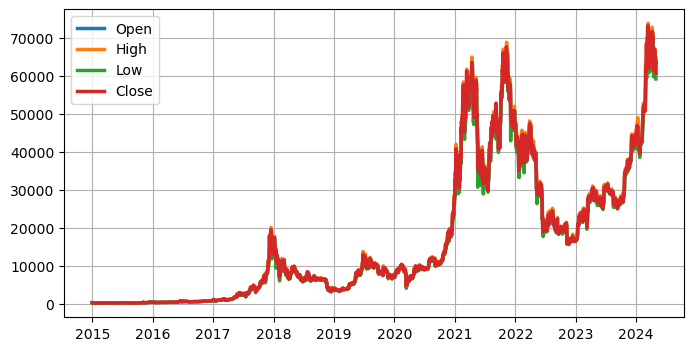

In [6]:
line_matplotlib(dataset, ["Open", "High", "Low", "Close"])

### 3. Data Preprocessing

In [7]:
# call func preprocessing
x_train, y_train, x_test, y_test = preprocessing(dataset)

# show dimention
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2666, 60, 1) (2666,)
(622, 60, 1) (622,)
